***Sam Cressman***

For our first project, we're going to take a look at SAT and ACT scores around the United States. Suppose that the College Board - the organization that administers the SAT - seeks to improve the participation rate of its exams. Your presentation should be geared toward **non-technical** executives with the College Board and you will use, at minimum, the provided data to make recommendations about how the College Board might work to increase the participation rates of these exams.

__[Slide Deck](https://docs.google.com/presentation/d/1YzxGcwLkP6a50YETOtpXCiewMLOPChsrTUwNrQ5SnL8/edit#slide=id.g3948971125_0_136)__

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

act = pd.read_csv("../data/act.csv")
sat = pd.read_csv("../data/sat.csv")

##### 2. Print the first ten rows of each dataframe.

In [3]:
act.head(10);

In [4]:
act.tail();

In [5]:
sat.head(10);

In [6]:
sat.tail();

##### 3. Describe in words what each variable (column) is.

State (for both ACT/SAT): state being measured
Participation rate(for both ACT/SAT): % of students in state who took that specific test
English (ACT): ACT test category average
Math (ACT): ACT test category average
Reading (ACT): ACT test category average
Science (ACT): ACT test category average
Composite (ACT): average of English, Math, Reading, and Science categories (total score)
Evidence-Based Reading and Writing (SAT): SAT test category average
Math (SAT): SAT test category average
Total (SAT): sum of Evidence-Based Reading and Writing and Math scores (total score)

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete. You can tell by using .info() or .describe on each DataFrame. Some issues are both DataFrames contain an unnamed column which I will remove, and the participation rate in each DataFrame is an object instead of a float. This will require cleaning. Furthermore, there must be an error in the SAT Math data because the minimum value is a 52 while the lowest possible score on a specific section is 200, and there is likely an an error in ACT Science since the minimum value is showing as 2.3 (very unlikely since each section is scored out of 36 and this is far from the ACT science column mean of 21).

In [7]:
act.drop(act.columns[0], axis=1, inplace=True)
sat.drop(sat.columns[0], axis=1, inplace=True)

In [8]:
act.describe().T;

In [9]:
sat.describe().T;

##### 5. Print the types of each column.

In [10]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [11]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Participation needs to be reassigned from a string to a float.

In [12]:
act["Participation"] = act["Participation"].str.replace("%", "").astype(float)
# act.info() confirms change

In [13]:
sat["Participation"] = sat["Participation"].str.replace("%", "").astype(float)
# sat.info() confirms change

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [14]:
act_state_participation = dict(zip(act["State"], act["Participation"]))
act_english = dict(zip(act["State"], act["English"]))
act_math = dict(zip(act["State"], act["Math"]))
act_reading = dict(zip(act["State"], act["Reading"]))
act_science = dict(zip(act["State"], act["Science"]))
act_composite = dict(zip(act["State"], act["Composite"]))

In [15]:
sat_participation_rate = dict(zip(sat["State"], sat["Participation"]))
sat_reading_writing= dict(zip(sat["State"], sat["Evidence-Based Reading and Writing"]))
sat_math = dict(zip(sat["State"], sat["Math"]))
sat_total = dict(zip(sat["State"], sat["Total"]))

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [16]:
act_to_dict = act.to_dict(orient="list");

In [17]:
sat.to_dict(orient="list");

##### 9. Merge the dataframes on the state column.

The iloc below changes apparent issues with the Maryland SAT Math/ACT Science data. As mentioned above, the Maryland SAT Math was set to 52 instead of 524 (used Google here as well as websites included in the Project), and the Maryland 
ACT Science score was set to 2.3 instead of 23.2.

In [18]:
act_sat = pd.merge(act, sat, on="State")
act_sat.iloc[20, 9] = 524
act_sat.iloc[20, 5] = 23.2

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [19]:
act_sat.rename(columns={
    "State":"State",
    "Participation_x":"ParACT",
    "English":"EnglishACT", 
    "Math_x":"MathACT",
    "Reading":"ReadingACT", 
    "Science":"ScienceACT", 
    "Composite": "CompositeACT",
    "Participation_y": "ParSAT",
    "Evidence-Based Reading and Writing": "ReadingWritingSAT",
    "Math_y": "MathSAT",
    "Total": "TotalSAT"
}, inplace=True)

act_sat.head();

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [20]:
act_sat.describe()

,ParACT,EnglishACT,MathACT,ReadingACT,ScienceACT,CompositeACT,ParSAT,ReadingWritingSAT,MathSAT,TotalSAT
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,39.803922,569.117647,556.882353,1126.098039
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,35.276632,45.666901,47.121395,92.494812
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,482.000000,468.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.000000,533.500000,523.500000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


In [21]:
# Instead of just using describe, I built functions for returning the max/min State for a desired DataFrame column.
def act_sat_max_column(column):
    return act_sat[act_sat[column] == act_sat[column].max()]

act_sat_max_column("EnglishACT");

In [22]:
def act_sat_min_column(column):
    return act_sat[act_sat[column] == act_sat[column].min()]

act_sat_min_column("EnglishACT");

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [23]:
def standard_deviation(lst):
    average = np.mean(lst)
    mean_sub = lst - average
    squared_vals = mean_sub ** 2
    squared_vals_average = np.mean(squared_vals)
    return np.sqrt(squared_vals_average)

numeric_list = ["ParACT", "EnglishACT", "MathACT", "ReadingACT", "ScienceACT", 
                "CompositeACT", "ParSAT", "ReadingWritingSAT", "MathSAT", "TotalSAT"]

sd = []
for col in numeric_list:
    sd_val = standard_deviation(act_sat[col]) 
    sd.append(sd_val)
    print(col, "standard deviation: ", sd_val)

ParACT standard deviation:  31.824175751231806
EnglishACT standard deviation:  2.3304876369363363
MathACT standard deviation:  1.9624620273436781
ReadingACT standard deviation:  2.0469029314842646
ScienceACT standard deviation:  1.7222161451443676
CompositeACT standard deviation:  2.000786081581989
ParSAT standard deviation:  34.92907076664508
ReadingWritingSAT standard deviation:  45.21697020437866
MathSAT standard deviation:  46.65713364485503
TotalSAT standard deviation:  91.58351056778743


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [24]:
act_sat_copy = act_sat.copy()

copy = pd.DataFrame(([sd]), columns=act_sat_copy.columns[1:])

new = act_sat_copy.append(copy)

new.tail();

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [25]:
act_sat.sort_values(["ParSAT"], ascending=False).head();

In [26]:
act_sat.sort_values(["ParACT"], ascending=False).head();

Below I tested to find "winner take all" states and potential states of opportunity.

In [27]:
mask = (act_sat["ParACT"] == 100)
act_sat[mask][["State","ParACT","ParSAT"]];

In [776]:
mask = (act_sat["ParSAT"] == 100)
act_sat[mask][["State","ParSAT","ParACT"]];

In [753]:
mask = ((act_sat["ParSAT"] < 75) & (act_sat["ParSAT"] > 20) & (act_sat["ParACT"] < 70))
act_sat[mask][["State","ParACT","ParSAT"]];

In [754]:
mask = ((act_sat["ParSAT"] < 75) & (act_sat["ParSAT"] > 10) & (act_sat["ParACT"] < 70))
act_sat[mask][["State","ParACT","ParSAT"]].sort_values(["ParSAT"], ascending=False);

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [777]:
par_over_50 = act_sat.loc[(act_sat["ParACT"] > 50) & (act_sat)["ParACT"] > 50]

par_over_50.head();

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

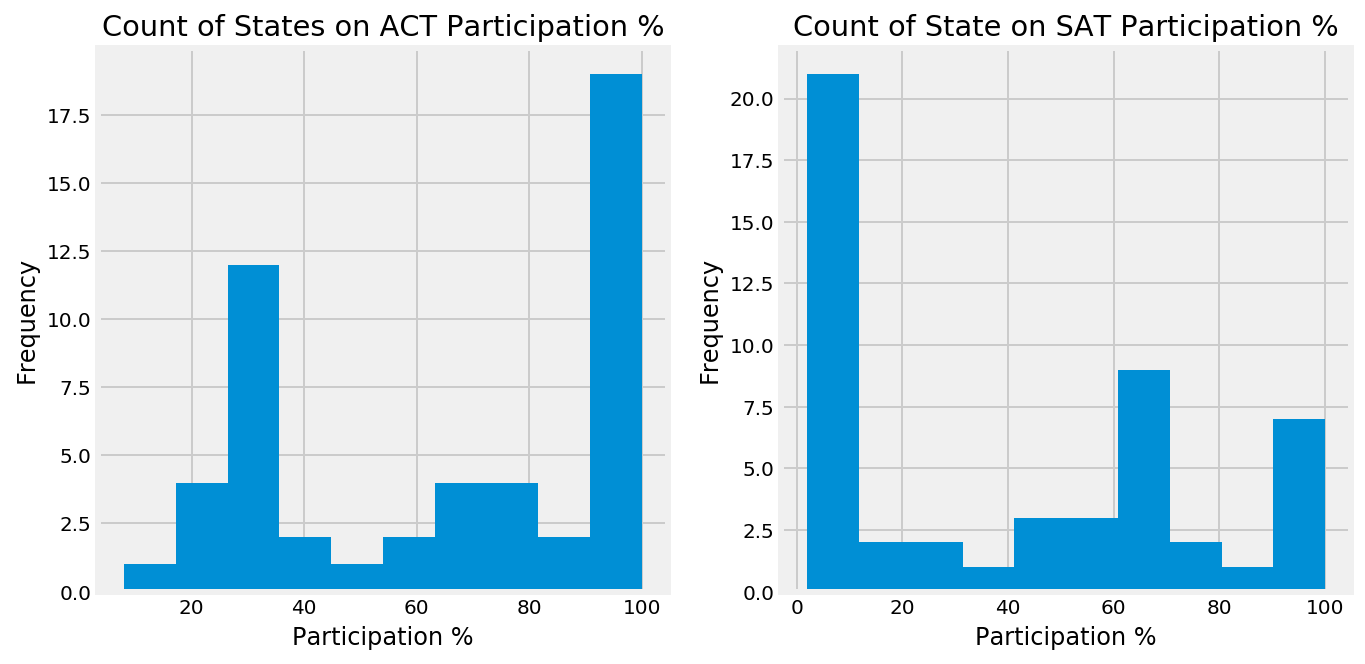

In [757]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
act_sat["ParACT"].plot(title="Count of States on ACT Participation %", kind="hist", ax=ax[0])
act_sat["ParSAT"].plot(title="Count of State on SAT Participation %", kind="hist", ax=ax[1])

ax[0].set_xlabel("Participation %")
ax[1].set_xlabel("Participation %")

plt.show()

##### 17. Plot the Math(s) distributions from both data sets.

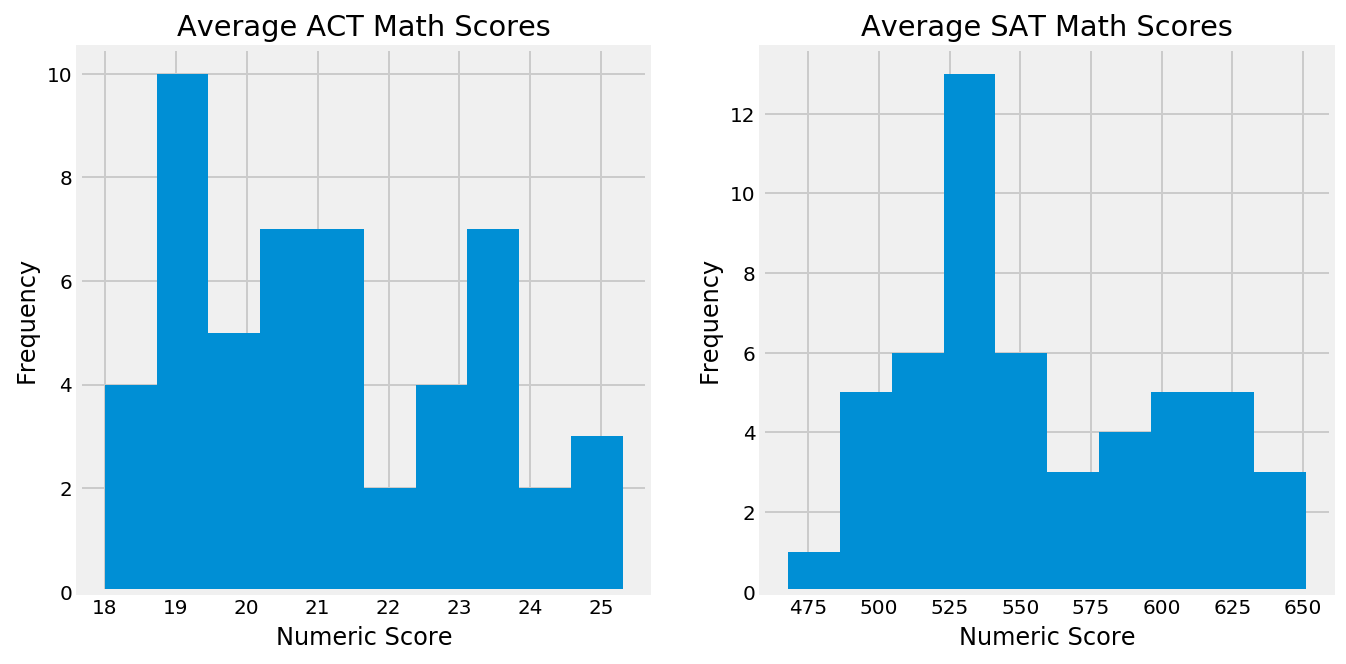

In [758]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

act_sat["MathACT"].plot(title="Average ACT Math Scores", kind="hist", ax=ax[0])
act_sat["MathSAT"].plot(title="Average SAT Math Scores", kind="hist", ax=ax[1])

ax[0].set_xlabel("Numeric Score")
ax[1].set_xlabel("Numeric Score")

plt.show()

##### 18. Plot the Verbal distributions from both data sets.

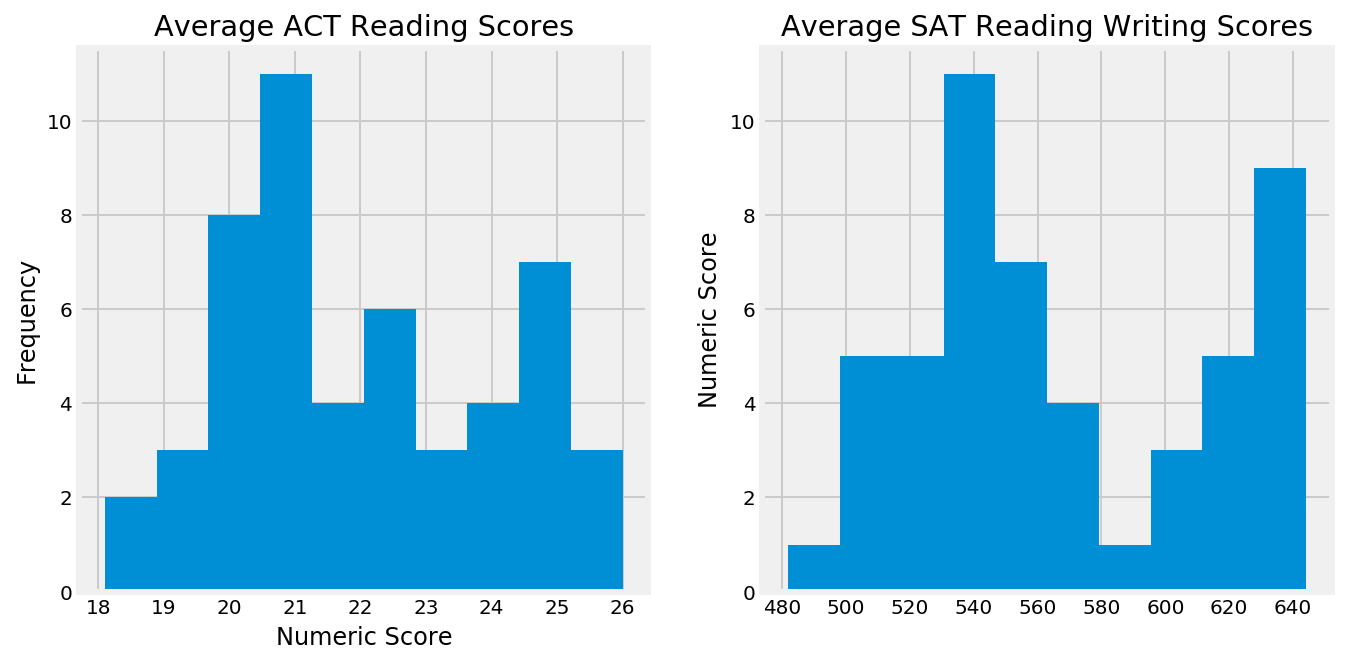

In [759]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
act_sat["ReadingACT"].plot(title="Average ACT Reading Scores", kind="hist", ax=ax[0])
act_sat["ReadingWritingSAT"].plot(title="Average SAT Reading Writing Scores", kind="hist", ax=ax[1])

ax[0].set_xlabel("Numeric Score")
ax[1].set_ylabel("Numeric Score")

plt.show()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

When we make assumptions about how data are distributed, we assume that with a the true population is normally distributed, and samples are normally distributed with a sample size > 30 per the Central Limit Theorem.

##### 20. Does this assumption hold true for any of our columns? Which?

Using the below pvalues per column as well as the null hypothesis that the columns are normally distributed, this assumption only holds true the English ACT, Science ACT, and Math SAT columns. These are the only columns where we can fail to reject the null hypothesis. 

In [778]:
numeric_list = ["ParACT", "EnglishACT", "MathACT", "ReadingACT", "ScienceACT", 
                "CompositeACT", "ParSAT", "ReadingWritingSAT", "MathSAT", "TotalSAT"]

for col in numeric_list:
    normal_test = stats.normaltest(act_sat[col])
    print(col, "Normal Test: ", normal_test)    

ParACT Normal Test:  NormaltestResult(statistic=72.50510406893655, pvalue=1.8018419611696254e-16)
EnglishACT Normal Test:  NormaltestResult(statistic=4.945616782086351, pvalue=0.08434764489205682)
MathACT Normal Test:  NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)
ReadingACT Normal Test:  NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
ScienceACT Normal Test:  NormaltestResult(statistic=5.501326521192349, pvalue=0.0638854744336635)
CompositeACT Normal Test:  NormaltestResult(statistic=6.557389886662569, pvalue=0.03767739587231253)
ParSAT Normal Test:  NormaltestResult(statistic=24.844012826931053, pvalue=4.028943345766873e-06)
ReadingWritingSAT Normal Test:  NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)
MathSAT Normal Test:  NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)
TotalSAT Normal Test:  NormaltestResult(statistic=9.607185954097002, pvalue=0.008200230814088539)


In [761]:
for col in numeric_list:
    skew_test = stats.skew(act_sat[col])
    print (col, "Skew Test: ", skew_test)

ParACT Skew Test:  -0.19211796242279808
EnglishACT Skew Test:  0.34220217359811805
MathACT Skew Test:  0.3228174361152988
ReadingACT Skew Test:  0.2613779187300745
ScienceACT Skew Test:  0.21233390930923077
CompositeACT Skew Test:  0.3103255637098951
ParSAT Skew Test:  0.33617543925343646
ReadingWritingSAT Skew Test:  0.2646065965076702
MathSAT Skew Test:  0.35421485843432615
TotalSAT Skew Test:  0.30168334986069095


##### 21. Plot some scatterplots examining relationships between all variables.

Text(0,0.5,'SAT Scores')

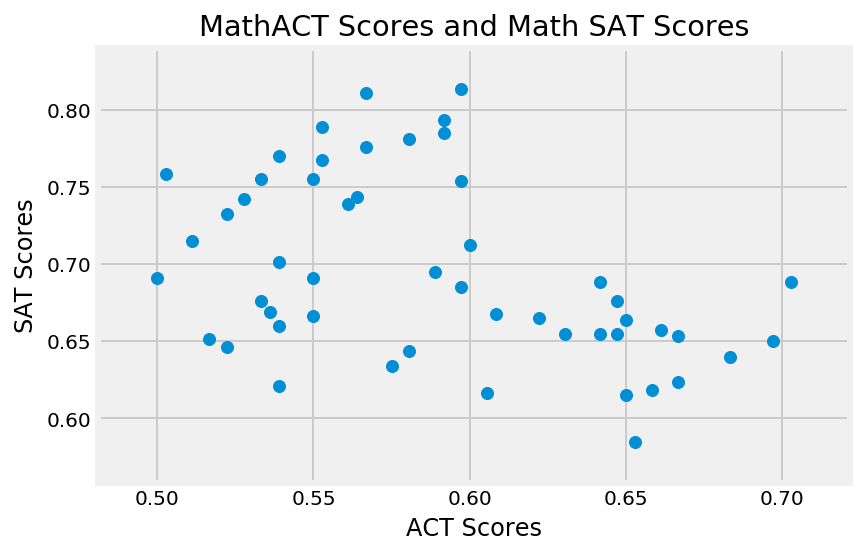

In [779]:
plt.scatter(x=act_sat["MathACT"]/36, y=act_sat["MathSAT"]/800)
plt.title("MathACT Scores and Math SAT Scores")
plt.xlabel("ACT Scores")
plt.ylabel("SAT Scores")

Text(0.5,1,'MathACT Scores vs. MathSAT Scores')

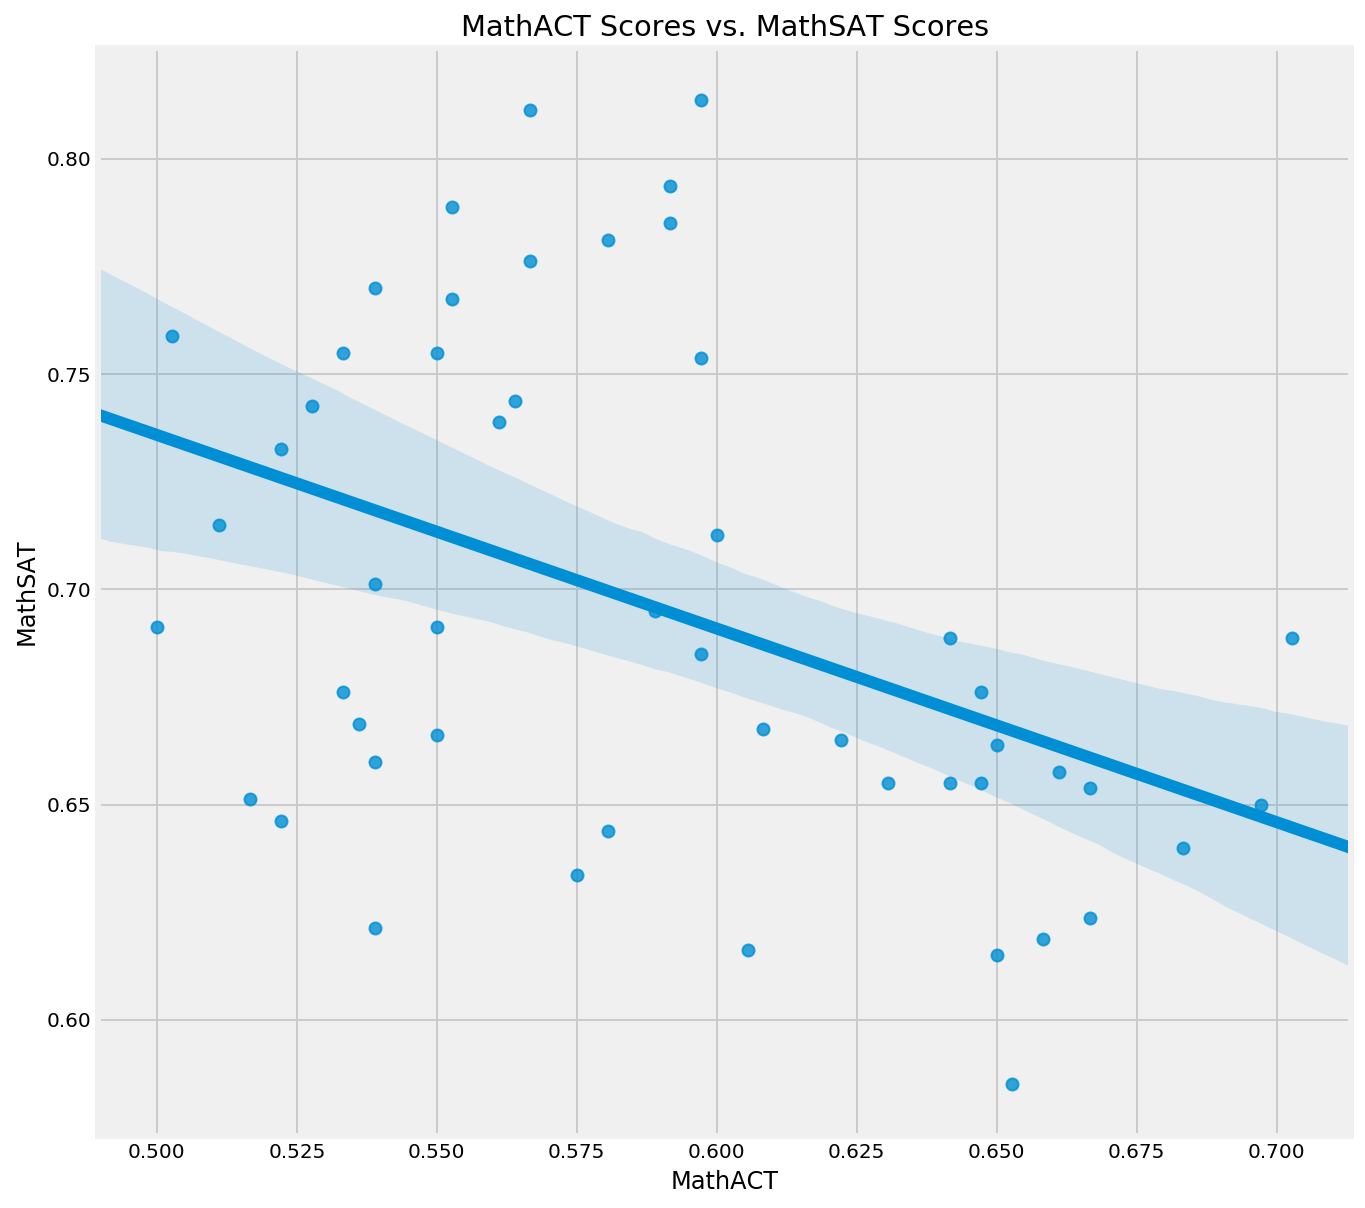

In [763]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
sns.regplot(x=act_sat["MathACT"]/36, y=act_sat["MathSAT"]/800)
ax.set_title("MathACT Scores vs. MathSAT Scores")

Text(0,0.5,'SAT Partitipation')

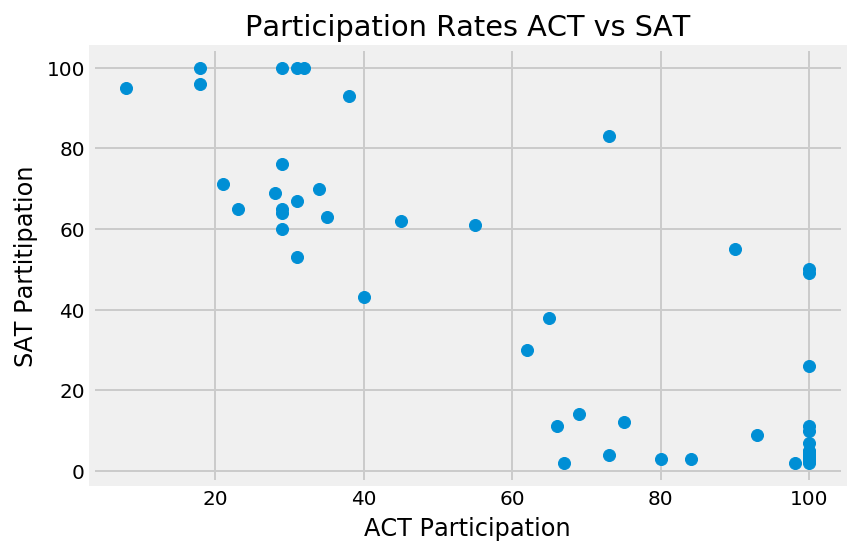

In [764]:
plt.scatter(x=act_sat["ParACT"], y=act_sat["ParSAT"])
plt.title("Participation Rates ACT vs SAT")
plt.xlabel("ACT Participation")
plt.ylabel("SAT Partitipation")

Text(0,0.5,'SAT Total Score')

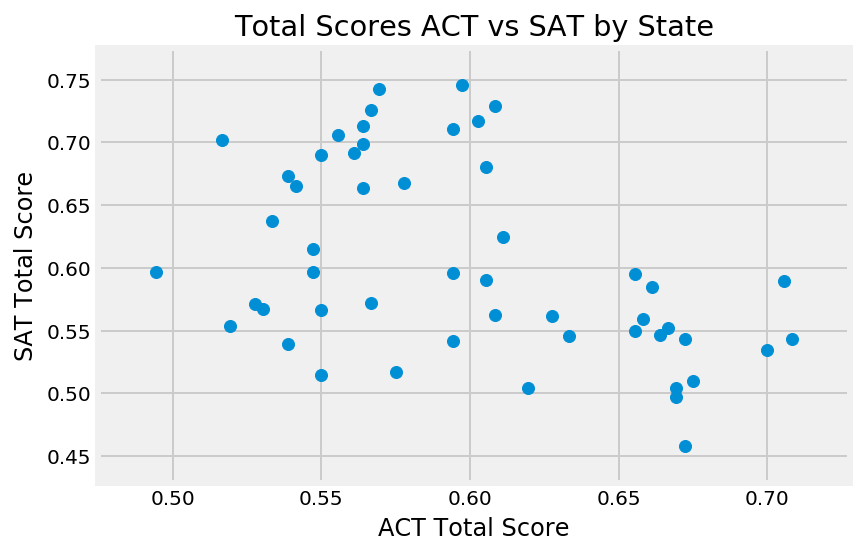

In [765]:
plt.scatter(x=act_sat["CompositeACT"]/36, y=(act_sat["TotalSAT"] - 400) / 1200)
plt.title("Total Scores ACT vs SAT by State")
plt.xlabel("ACT Total Score")
plt.ylabel("SAT Total Score")

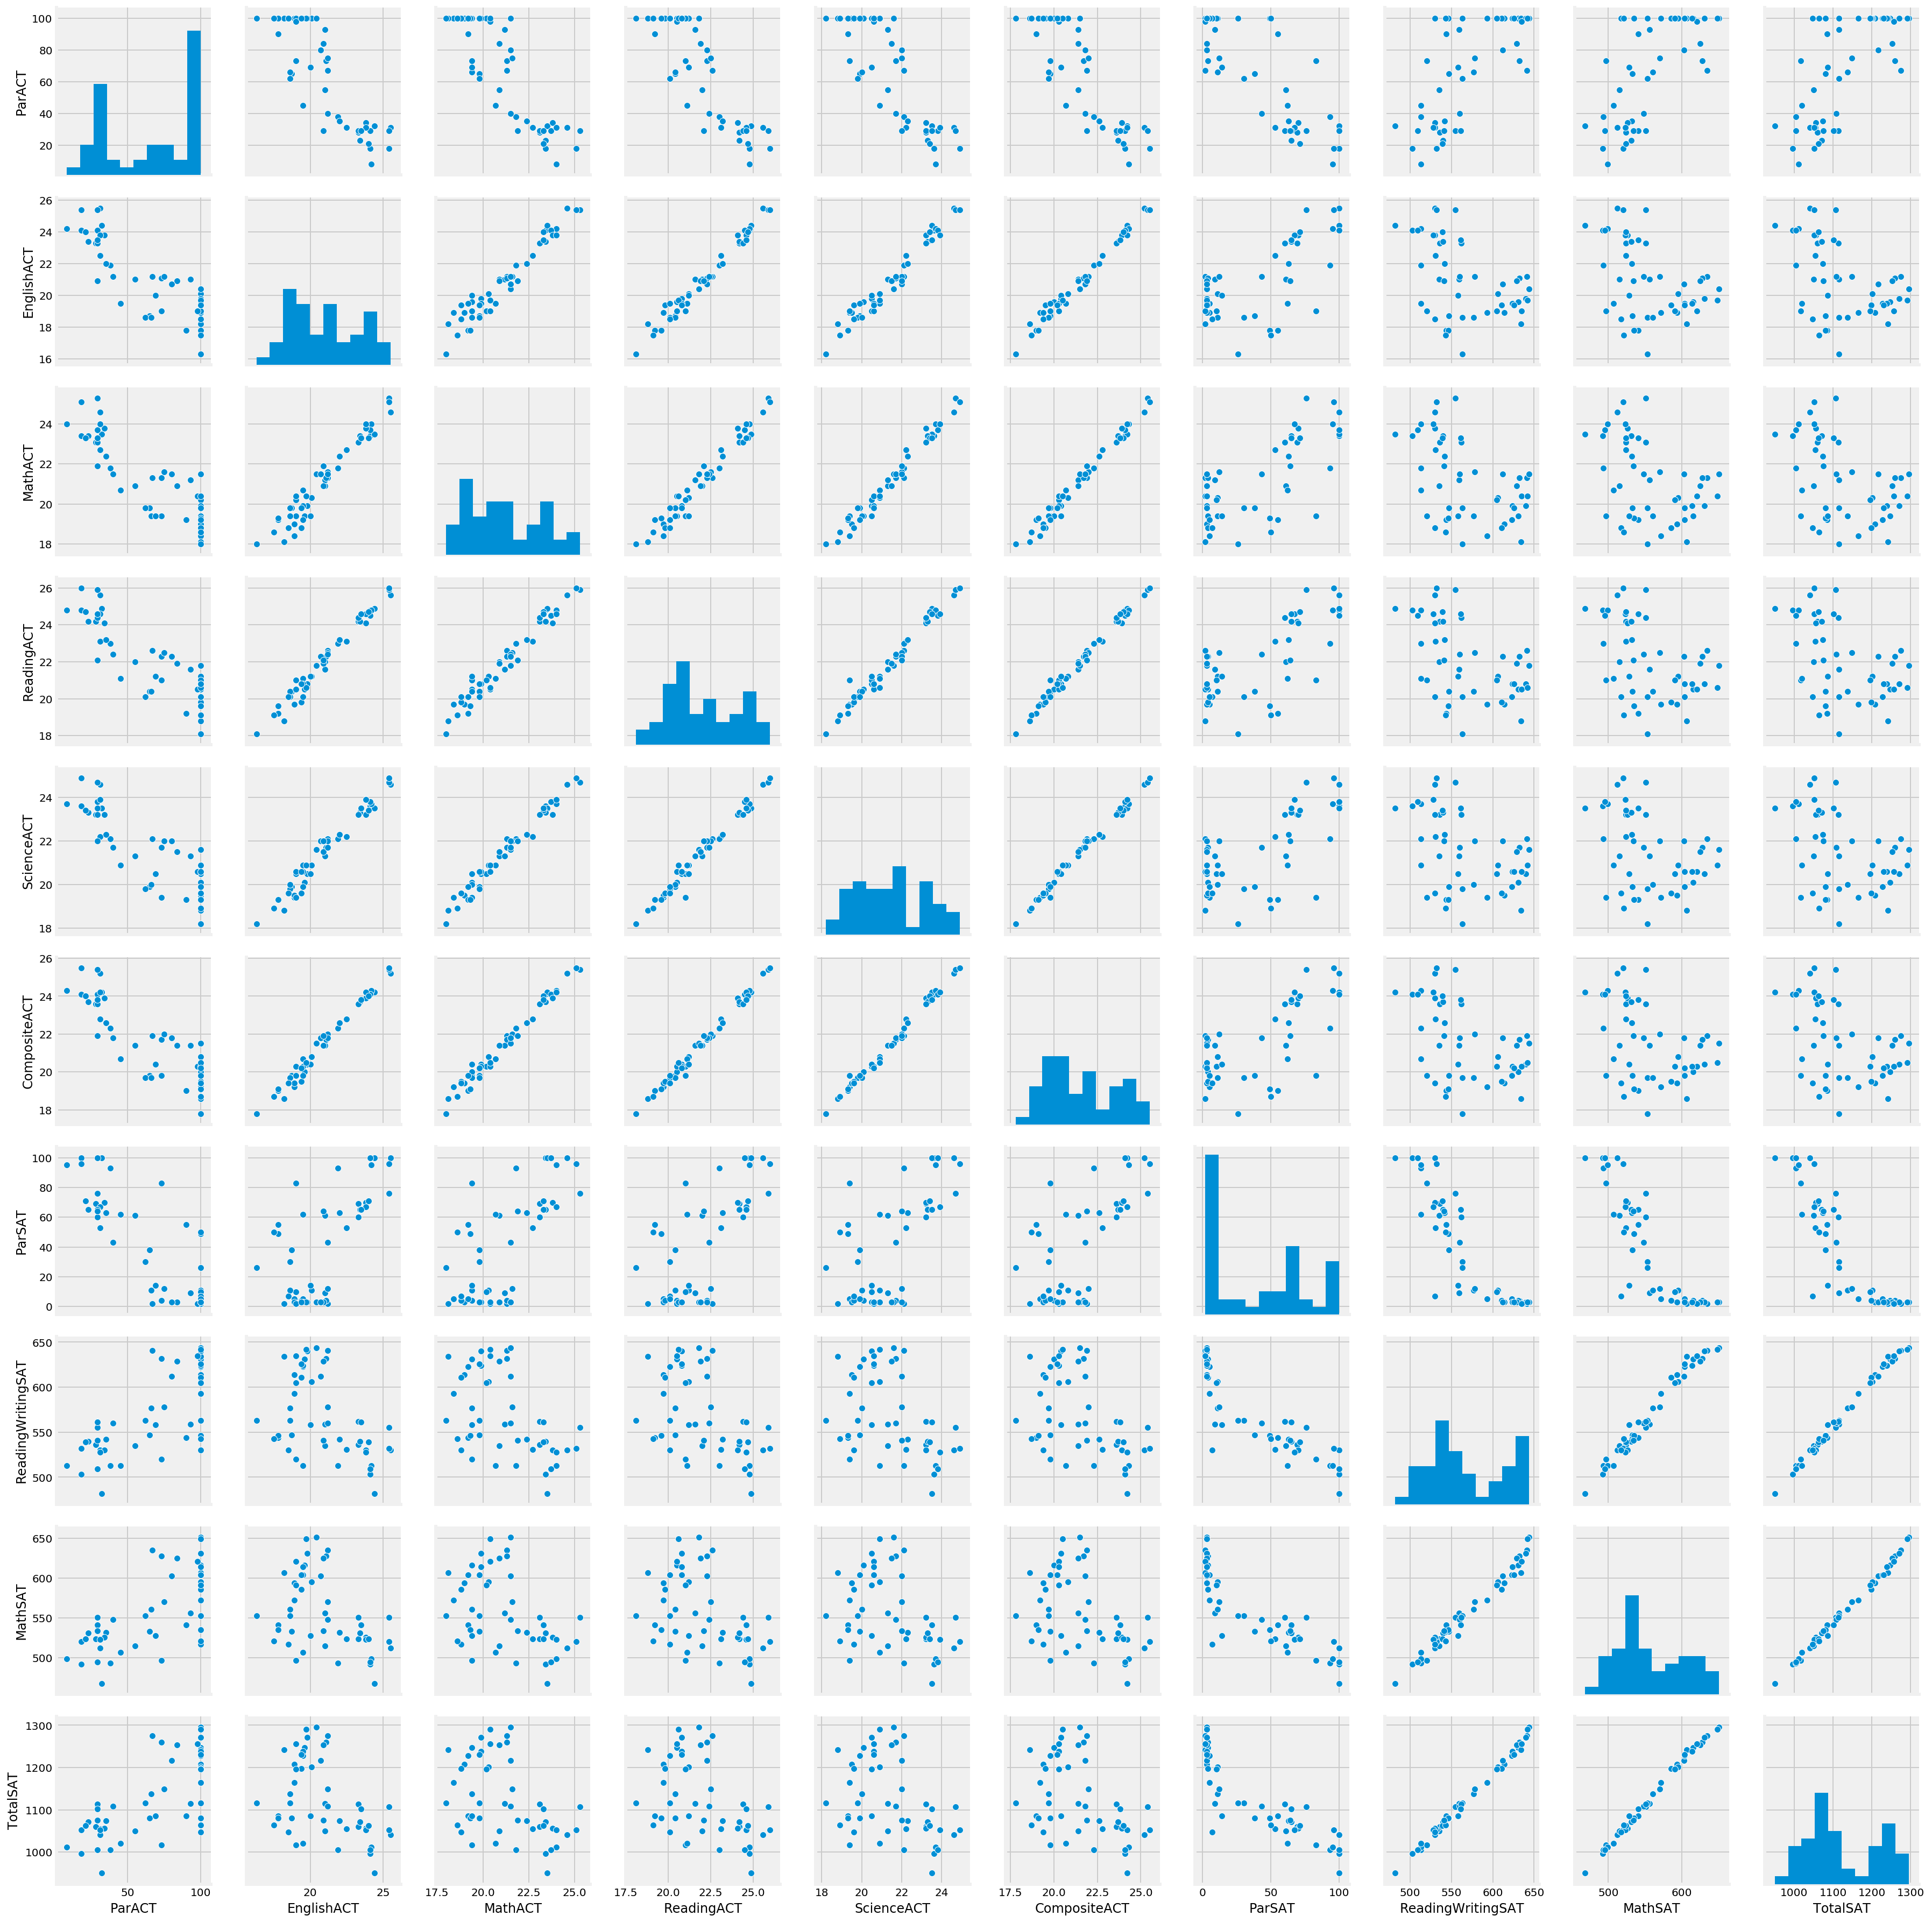

In [766]:
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = "retina"
%matplotlib inline

sns.pairplot(act_sat)

##### 22. Are there any interesting relationships to note?

Participation rates between the ACT and SAT. It appears that most students either take one or the other. Furthermore, the tests themselves/their own categories for the most part have random and mostly negative relationships. 

Also, when comparing similar ACT and SAT subject matters, there is not a strong correlation. I would infer this means that there are strategies for taking each test that do not transfer between the tests. For example, you can be a strong ACT test taker, but that does not mean you will be a strong SAT test taker. 

##### 23. Create box plots for each variable. 

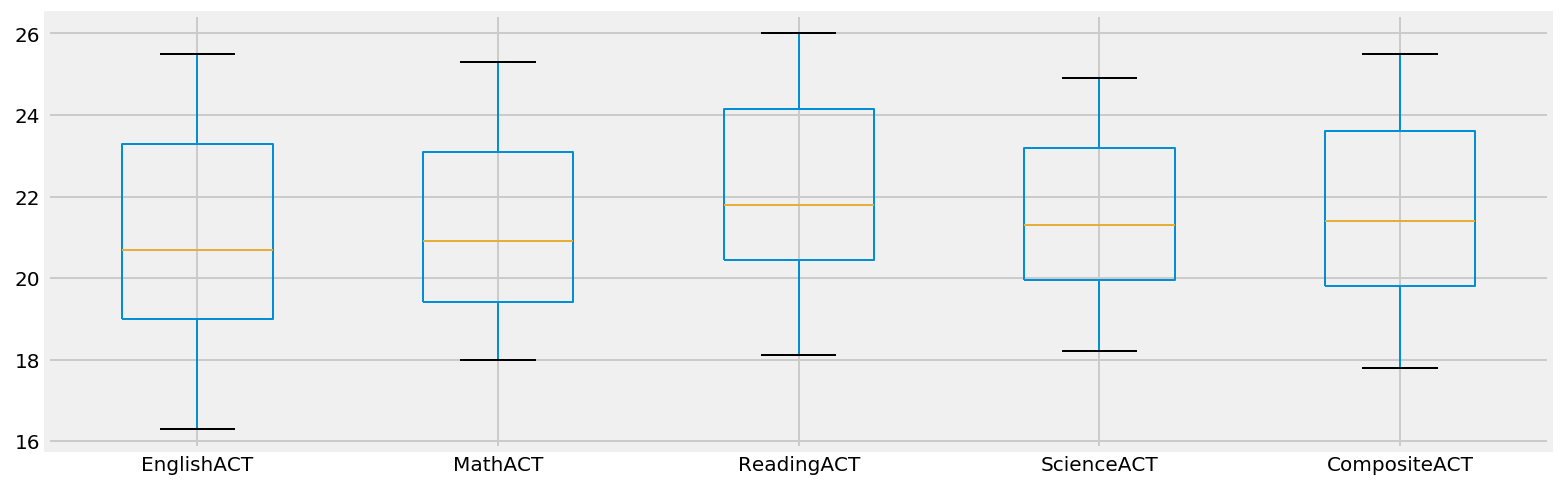

In [767]:
pd.DataFrame.boxplot(act_sat, column=["EnglishACT", "MathACT", "ReadingACT", "ScienceACT", "CompositeACT"], figsize=(12,4))

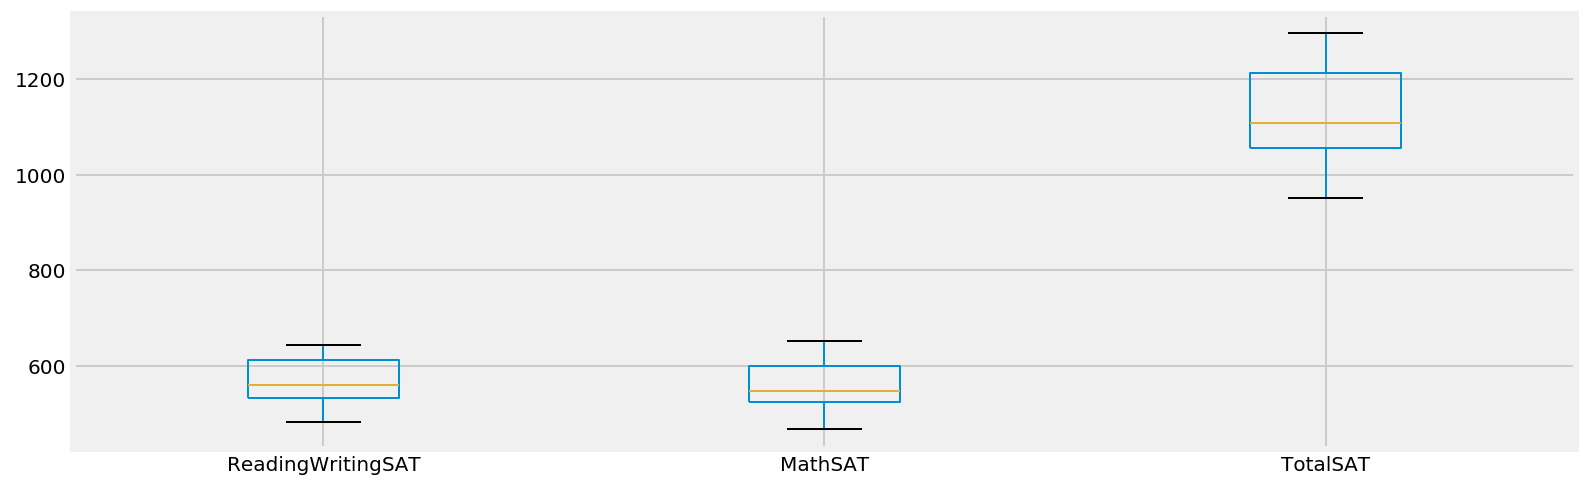

In [768]:
pd.DataFrame.boxplot(act_sat, column=["ReadingWritingSAT", "MathSAT", "TotalSAT"], figsize=(12,4))

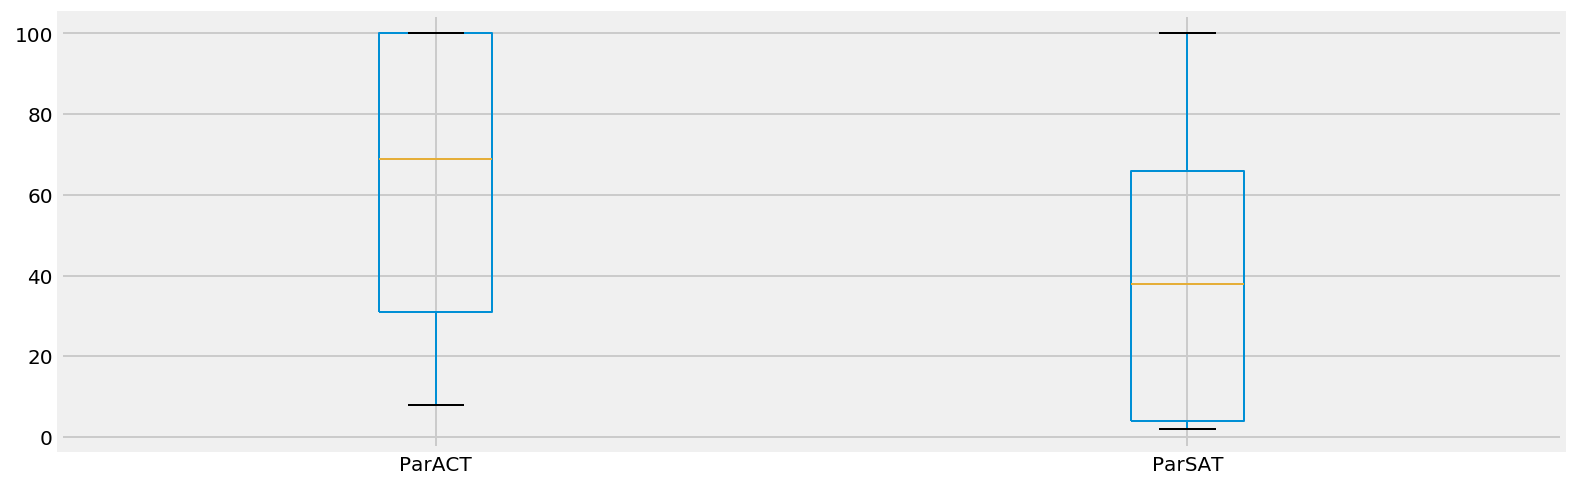

In [769]:
pd.DataFrame.boxplot(act_sat, column=["ParACT", "ParSAT"], figsize=(12,4))

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

Since we are concerned mainly with center, shape, and spread, when viewing the distributions for the ACT, the mean of the test categories (English, Math, Reading, and Science) is around 21 with a standard deviation of around 2. This makes sense since the mean composite score is approximately 21.5, the 25th quartile is approximately 19.5, and the 75% quartile is between 23 and 24. 

For the SAT test categories (Reading/Writing and Math), the mean is approximately 561 with a standard deviation of approximately 46. For the SAT total, the mean is 1126 with a standard deviation of 92.4.

What I find most interesting is comparing ACT participation rates vs. SAT participation rates. The mean ACT participation rate is 65.2 while the mean SAT participation rate is 39.8. To me this means that states are more heavily participating in the ACT than the SAT.

In [780]:
act_sat.describe();

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

When viewing the heatmap and correlation tables, we can see that the ACT categories have high correlations, the SAT categories have high correlations, and neither test is highly correlated with eachother (as displayed by the darker purple). 

It appears that students are taking either the ACT or the SAT, and it also appears that you can "study" for each test. For example, ACT Math and SAT Math are both math but have a weak correlation. I would infer that test success is less based on knowledge of subject matter and more based on how well you take tests (or more specifically how well you prepare for the ACT or SAT specifically). Furthermore, as mentioned above, you can find success on the ACT and ACT categories, but that does not mean you will find success in similar categories between the tests. 

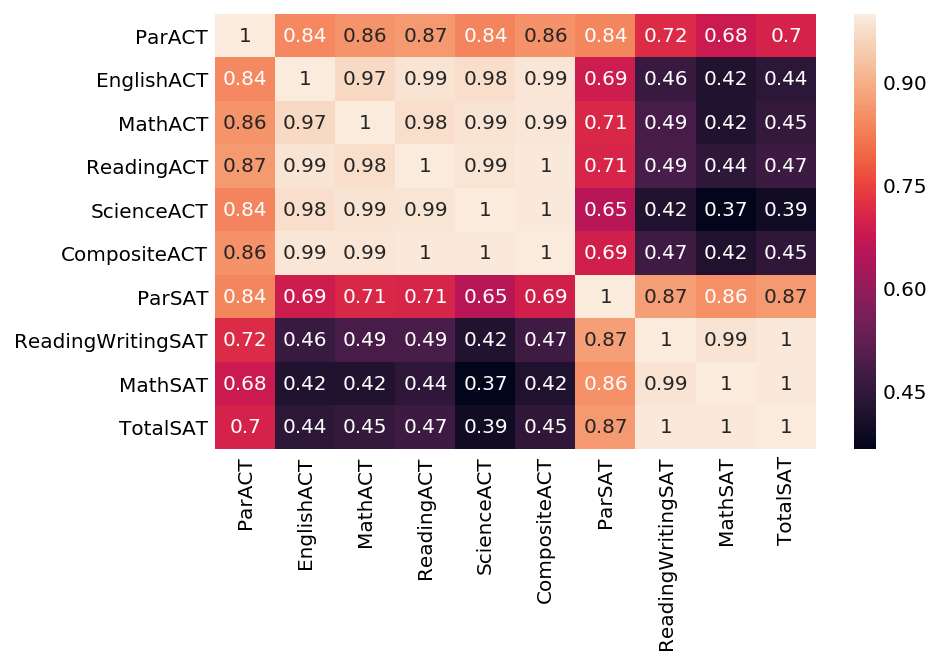

In [771]:
sns.heatmap(np.abs(act_sat.corr()), annot=True)

In [772]:
act_sat.corr();

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [773]:
hypothesis_act_sat = stats.ttest_ind(act_sat["ParACT"], act_sat["ParSAT"])
hypothesis_act_sat

Ttest_indResult(statistic=3.8085778908170544, pvalue=0.00024134203698662353)

With a very small pval of 0.00024, and with a null hypothesis that the Participation ACT and Participation SAT are the same (not different), we can reject the null hypothesis and assume that the participation rates are actually different.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [774]:
mean_act_participation = np.mean(act_sat["ParACT"])
standard_error_act_participation = np.std(act_sat["ParACT"]) / np.sqrt(act_sat["ParACT"].shape[0])
                                                                       
stats.norm.interval(0.95, mean_act_participation, standard_error_act_participation)

(56.5207615945811, 73.98904232698752)

Interpretation of 95% confidence intervals: if we were to take 100 sample means and their confidence intervals of ACT Participation Rates, we would expect 95 of the confidence intervals would contain the true population mean.

In [775]:
mean_sat_participation = np.mean(act_sat["ParSAT"])
standard_error_sat_participation = np.std(act_sat["ParSAT"]) / np.sqrt(act_sat["ParSAT"].shape[0])
                                                                       
stats.norm.interval(0.95, mean_sat_participation, standard_error_sat_participation)

(30.217643220943465, 49.39019991631144)

Interpretation of 95% confidence intervals: if we were to take 100 sample means and their confidence intervals of SAT Participation Rates, we would expect 95 of the confidence intervals would contain the true population mean.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No. In 26 we determined that we should reject the null hypothesis that the ACT and SAT participation rates are the same. Viewing the confidence intervals for the ACT and SAT, they do not even overlap, and this helps us to assume that the participation rates are actually different.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

Probably not. When viewing the correlation chart above, the correlation between SAT and ACT math is -0.420456. This is not a very strong correlation since correlations range between -1 (perfectly negative) and 1 (perfectly positive). The heat map further displays this weak correlation.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Probably not. We only have data for one year: we would likely need more data to examine trends over time. For example, the ACT participation was significantly higher than the SAT participation in 2017. However, in 2016 the SAT changed how it is scored significantly (http://sat.ivyglobal.com/new-vs-old/). Will SAT participation rates increase with no guessing penalty moving forward? Since the SAT essay is now optional and the test is 50 minutes shorter than previously if you do not take the essay, will more students be inclined to take the SAT? Is the ACT participation rate higher due to uncertainty around changes to the SAT test? Some states have high participation rates in one test and very little participation in the other: are there political factors at play? What if colleges start to require both tests or prefer one test over the other? Is one test participation shrinking while the other is growing? More data over time could help to answer some of these questions. 